In [26]:
import sys
import os
# Add the scripts directory to the system path
sys.path.append(r"D:\Kifya_training\Week 1\Financial-News-Sentiment-Analysis\scripts")
# Import modules from external Python files
import matplotlib.pyplot as plt
from data_loader import prepare_news_data, prepare_stock_data
from data_preprocessing import preprocess_text
from sentiment_analysis import preprocess_sentiment_data
from stock_analysis import calculate_daily_returns
from scipy.stats import pearsonr
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from visualization import plot_daily_sentiment




ImportError: cannot import name 'plot_daily_sentiment' from 'visualization' (D:\Kifya_training\Week 1\Financial-News-Sentiment-Analysis\scripts\visualization.py)

In [15]:

# Define the base directory for the news data
news_file = r"D:\Kifya_training\Week 1\Technical  Content\Data\raw_analyst_ratings.csv"

In [17]:
# Function to preprocess sentiment data
def preprocess_sentiment_data(file_path, text_column):
    news_df = pd.read_csv(file_path)

    # Analyze sentiment
    news_df = analyze_sentiment_vader(news_df, text_column)

    # Aggregate daily sentiment scores
    daily_sentiment = aggregate_daily_sentiment(news_df, 'date', 'sentiment_score')

    return daily_sentiment

# Function to analyze sentiment using VADER
def analyze_sentiment_vader(df, text_column):
    sid = SentimentIntensityAnalyzer()
    df['sentiment_score'] = df[text_column].apply(lambda x: sid.polarity_scores(x)['compound'])
    return df

# Modified function to aggregate daily sentiment
def aggregate_daily_sentiment(df, date_column, sentiment_column):
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    df = df.dropna(subset=[date_column])
    daily_sentiment = df.groupby(df[date_column].dt.date)[sentiment_column].mean().reset_index()
    daily_sentiment.columns = ['date', 'average_sentiment']
    return daily_sentiment

# Prepare and aggregate daily sentiment data
daily_sentiment = preprocess_sentiment_data(news_file, text_column='headline')

# Preview the aggregated daily sentiment
print(daily_sentiment.head())


         date  average_sentiment
0  2011-04-27            0.00000
1  2011-04-28            0.12500
2  2011-04-29            0.36755
3  2011-04-30            0.20230
4  2011-05-01            0.00000


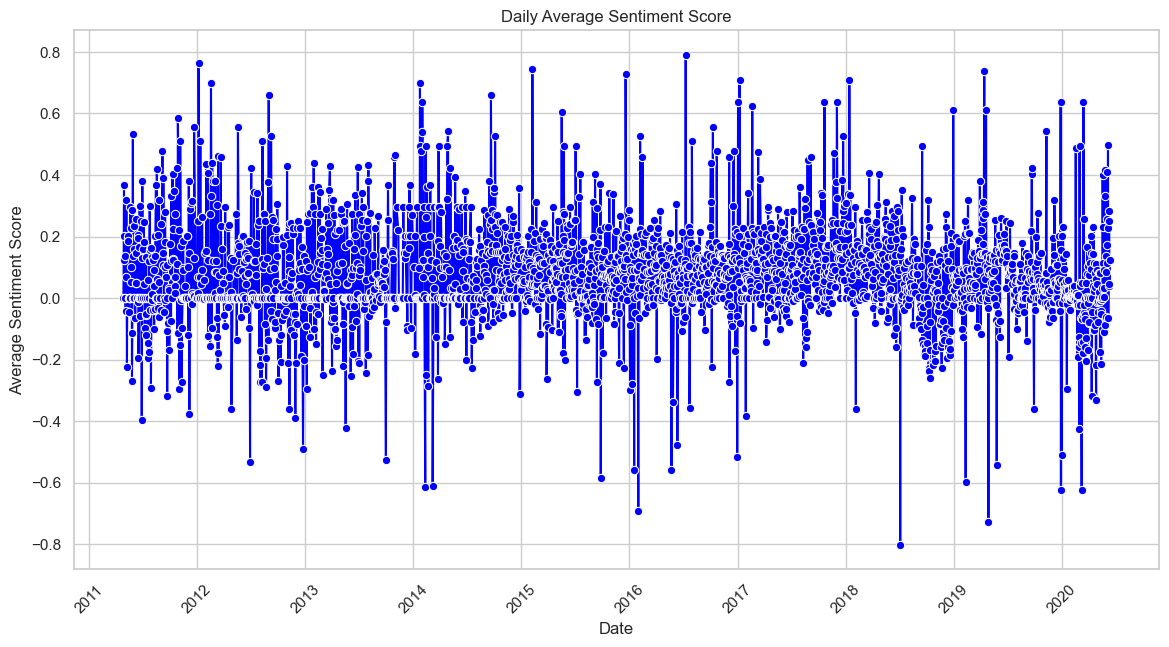

In [24]:
# Plot the daily average sentiment
plot_daily_sentiment(daily_sentiment)
